In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time

# data file locations
data_files = ["data/mb1/datafile-b'24.25'-1.txt",
              "data/mb1/datafile-b'24.75'-2.txt",
              "data/mb4/datafile-b'21.75'-1.txt"]

In [14]:

# read bytes from files
byte_files, number_files = [], []
for file_link in data_files:
    with open(file_link, "rb") as file:
        byte_files.append(file.read()) # list of files with butes stored as python bytes objects
        number_files.append(np.array(list(byte_files[-1]))) # represent each byte with a base-10 number between 0-255

65145
65163
65142


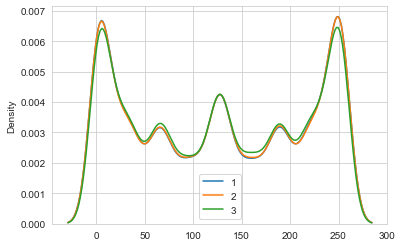

In [20]:

# plot the frequency density of all numbers (1 byte, 0-255) stored in the SRAM
sns.set_style('whitegrid')
for numbers in number_files:
    sns.kdeplot(numbers)
    print(len(numbers))
plt.legend(1+np.array(range(len(data_files))))
plt.savefig("figs/sram-frequency-density.pdf")

In [19]:
# find which numbers are different between runs on the same board

prev_file = number_files[0]
prev_mask = np.array([True for x in range(len(number_files[0]))])
for file in number_files:
    file = file
    mask = np.equal(file, prev_file)
    prev_mask = np.bitwise_and(mask, prev_mask)



random_bits_mask = ~prev_mask.reshape(-1)
random_bits_mask

ValueError: operands could not be broadcast together with shapes (65163,) (65145,) 

In [ ]:
read_bytes = []
with open("data/mb1/datafile-b'26.25'-1.txt", 'rb') as f:
    while byte := f.read(1):
        read_bytes.append(format(int.from_bytes(byte, "little"), '08b'))

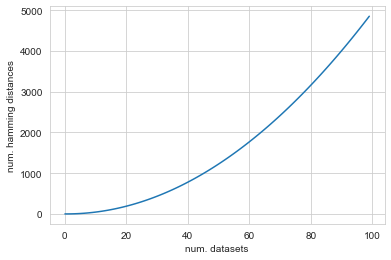

In [24]:
lengths = range(100)
combos = []
for l in lengths:
    combos.append(len([list(comb) for comb in itertools.combinations(range(l), 2)]))

plt.plot(lengths, combos)
plt.xlabel("num. datasets")
plt.ylabel("num. hamming distances")
plt.savefig("figs/exponential hamming distances.pdf")

In [31]:
import os
os.listdir("data/mb3/")

['data9-29.bin',
 'data4 -29.bin',
 'data7-29.bin',
 'data5 -29.bin',
 'data10-29.bin',
 'data3 -29.bin',
 'data8-29.bin',
 'data2 -29.bin',
 'data6-29.bin',
 'data1 -29.bin']